_Course: Programming for Data Analytics_
- Name: Muhammad Umar Uz Zaman
- Student ID: 1197819
- Goal: EDA Analysis of the given dataset to predict future housing market trends

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Loading dataset in to start analysis (I changed the name of the csv for ease) and checking it out
df = pd.read_csv("Dataset.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             19995 non-null  float64
 1   bedrooms          19984 non-null  float64
 2   bathrooms         19988 non-null  float64
 3   sqft_living       19998 non-null  float64
 4   sqft_total        19994 non-null  float64
 5   floors            19999 non-null  float64
 6   condition         19998 non-null  float64
 7   grade             19999 non-null  int64  
 8   built             19998 non-null  float64
 9   renovated         19999 non-null  int64  
 10  living_area_sqft  19993 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 1.7 MB


In [44]:
# Summary statistics
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
count,1.999500e+04,19984.000000,19988.000000,19998.000000,1.999400e+04,19999.000000,19998.000000,19999.000000,19998.000000,19999.000000,19993.000000
mean,5.353944e+05,3.366593,2.072969,2057.936294,1.560696e+04,1.444872,3.441794,7.605730,1967.953145,90.812041,1974.197819
std,3.659217e+05,0.930136,0.761162,905.640821,4.177576e+04,0.516672,0.665473,1.172624,28.317403,415.947901,675.199588
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,1900.000000,0.000000,399.000000
25%,3.170000e+05,3.000000,1.500000,1420.000000,5.350000e+03,1.000000,3.000000,7.000000,1950.000000,0.000000,1490.000000
50%,4.499000e+05,3.000000,2.000000,1900.000000,7.817500e+03,1.000000,3.000000,7.000000,1969.000000,0.000000,1830.000000
75%,6.400000e+05,4.000000,2.500000,2510.000000,1.100000e+04,2.000000,4.000000,8.000000,1991.000000,0.000000,2336.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,2015.000000,2015.000000,6210.000000


In [45]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
0,221900.0,3.0,1.0,1180.0,5650.0,1.0,3.0,7,1955.0,0,1340.0
1,538000.0,3.0,NaN,2570.0,7242.0,2.0,3.0,7,1951.0,1991,1690.0
2,180000.0,2.0,1.0,770.0,10000.0,1.0,3.0,6,1933.0,0,2720.0
3,604000.0,4.0,3.0,1960.0,5000.0,1.0,5.0,7,1965.0,0,1360.0
4,510000.0,3.0,2.0,1680.0,8080.0,1.0,3.0,8,1987.0,0,1800.0


In [46]:
# Let's check if all the data types are correct for each column
df.dtypes

price               float64
bedrooms            float64
bathrooms           float64
sqft_living         float64
sqft_total          float64
floors              float64
condition           float64
grade                 int64
built               float64
renovated             int64
living_area_sqft    float64
dtype: object

In [47]:
df['price'].describe()

count    1.999500e+04
mean     5.353944e+05
std      3.659217e+05
min      7.500000e+04
25%      3.170000e+05
50%      4.499000e+05
75%      6.400000e+05
max      7.700000e+06
Name: price, dtype: float64

In [48]:
# Checking if all price value are integers and if any decimals are present
(df['price'] % 1 != 0).any()

True

Since price has all integers. No decimals we can convert it to int64

In [49]:
# So I tried to convert but since we have NaN (Null) values I cant. So let's deal with them first.
# df['price'] = df['price'].astype('int64')

In [50]:
df.isnull().sum()

price                4
bedrooms            15
bathrooms           11
sqft_living          1
sqft_total           5
floors               0
condition            1
grade                0
built                1
renovated            0
living_area_sqft     6
dtype: int64

We shall handle and eradicate all Null values from this dataset to prep it for analysis

In [51]:
# Price Null rows are completely dropped since they are so few and difficult to approximate the price
df = df.dropna(subset=['price'])

In [52]:
# For bedrooms I am using the median to fill in the values
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())

In [53]:
# For bathrooms lets check all unique values before deciding how to deal with them
df['bathrooms'].unique()

array([1.  ,  nan, 3.  , 2.  , 4.5 , 2.25, 1.5 , 2.5 , 1.75, 2.75, 3.25,
       4.  , 3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25])

In [54]:
# For bathrooms I shall choose median as well since it contains decimals
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())

In [55]:
# Median for sqft_living and sqft total
df['sqft_living'] = df['sqft_living'].fillna(df['sqft_living'].median())
df['sqft_total'] = df['sqft_total'].fillna(df['sqft_total'].median())

In [56]:
# For condition (which varies from 1 till 5) I am choosing mode since median could give a decimal answer
df['condition'] = df['condition'].fillna(df['condition'].mode()[0])

In [57]:
# For built I am choosing median since only one missing value and same for living area sqft
df['built'] = df['built'].fillna(df['built'].median())
df['living_area_sqft'] = df['living_area_sqft'].fillna(df['living_area_sqft'].median())

In [58]:
df.isnull().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_total          0
floors              0
condition           0
grade               0
built               0
renovated           0
living_area_sqft    0
dtype: int64

Null values have been removed from the dataset via median/mode Null value handling strategies taught in class

In [59]:
df.dtypes

price               float64
bedrooms            float64
bathrooms           float64
sqft_living         float64
sqft_total          float64
floors              float64
condition           float64
grade                 int64
built               float64
renovated             int64
living_area_sqft    float64
dtype: object

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19995 entries, 0 to 19998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             19995 non-null  float64
 1   bedrooms          19995 non-null  int64  
 2   bathrooms         19995 non-null  float64
 3   sqft_living       19995 non-null  int64  
 4   sqft_total        19995 non-null  int64  
 5   floors            19995 non-null  float64
 6   condition         19995 non-null  int64  
 7   grade             19995 non-null  int64  
 8   built             19995 non-null  int64  
 9   renovated         19995 non-null  int64  
 10  living_area_sqft  19995 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.8 MB


In [61]:
# Converting all columns with only whole number values from float64 to int64 for efficiency
# Not converting Floors and bathrooms since they contain  decimals

df['bedrooms'] = df['bedrooms'].astype('int64')           # bedrooms are always whole numbers
df['sqft_living'] = df['sqft_living'].astype('int64')     # square footage with no decimals
df['sqft_total'] = df['sqft_total'].astype('int64')       # total area, all whole numbers
df['condition'] = df['condition'].astype('int64')         # categorical 1–5 scale
df['built'] = df['built'].astype('int64')                 # year of construction
df['living_area_sqft'] = df['living_area_sqft'].astype('int64')  # whole-number area values

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19995 entries, 0 to 19998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             19995 non-null  float64
 1   bedrooms          19995 non-null  int64  
 2   bathrooms         19995 non-null  float64
 3   sqft_living       19995 non-null  int64  
 4   sqft_total        19995 non-null  int64  
 5   floors            19995 non-null  float64
 6   condition         19995 non-null  int64  
 7   grade             19995 non-null  int64  
 8   built             19995 non-null  int64  
 9   renovated         19995 non-null  int64  
 10  living_area_sqft  19995 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.8 MB


Beginning EDA 

In [71]:
summary_table = df.describe().T
summary_table

,count,mean,std,min,25%,50%,75%,max
price,19995.0,535394.404051,365921.655721,75000.0,317000.0,449900.0,640000.0,7700000.0
bedrooms,19995.0,3.366242,0.929898,1.0,3.0,3.0,4.0,33.0
bathrooms,19995.0,2.072893,0.760998,0.5,1.5,2.0,2.5,8.0
sqft_living,19995.0,2057.860465,905.621925,290.0,1420.0,1900.0,2510.0,13540.0
sqft_total,19995.0,15605.718430,41774.813188,520.0,5350.0,7814.0,11000.0,1651359.0
floors,19995.0,1.444811,0.516670,1.0,1.0,1.0,2.0,3.5
condition,19995.0,3.441760,0.665492,1.0,3.0,3.0,4.0,5.0
grade,19995.0,7.605451,1.172447,1.0,7.0,7.0,8.0,13.0
built,19995.0,1967.948887,28.317206,1900.0,1950.0,1969.0,1991.0,2015.0
renovated,19995.0,90.830208,415.987523,0.0,0.0,0.0,0.0,2015.0


In [72]:
# Let's check for skewness in the dataset
summary_table["skewness"] = df[summary_table.index].skew()
summary_table

,count,mean,std,min,25%,50%,75%,max,skewness
price,19995.0,535394.404051,365921.655721,75000.0,317000.0,449900.0,640000.0,7700000.0,4.119874
bedrooms,19995.0,3.366242,0.929898,1.0,3.0,3.0,4.0,33.0,2.155397
bathrooms,19995.0,2.072893,0.760998,0.5,1.5,2.0,2.5,8.0,0.553547
sqft_living,19995.0,2057.860465,905.621925,290.0,1420.0,1900.0,2510.0,13540.0,1.523693
sqft_total,19995.0,15605.718430,41774.813188,520.0,5350.0,7814.0,11000.0,1651359.0,13.040022
floors,19995.0,1.444811,0.516670,1.0,1.0,1.0,2.0,3.5,0.683503
condition,19995.0,3.441760,0.665492,1.0,3.0,3.0,4.0,5.0,0.915424
grade,19995.0,7.605451,1.172447,1.0,7.0,7.0,8.0,13.0,0.824340
built,19995.0,1967.948887,28.317206,1900.0,1950.0,1969.0,1991.0,2015.0,-0.448511
renovated,19995.0,90.830208,415.987523,0.0,0.0,0.0,0.0,2015.0,4.361997


- Price, Bedrooms, Sqft_Total, and Renovated are highly right skewed which will have to be fixed.
- Bathrooms, Floors, Condition, Grade are not as highly skewed but still skewed to the right
- Built is mostly symmetric since its under ±0.5

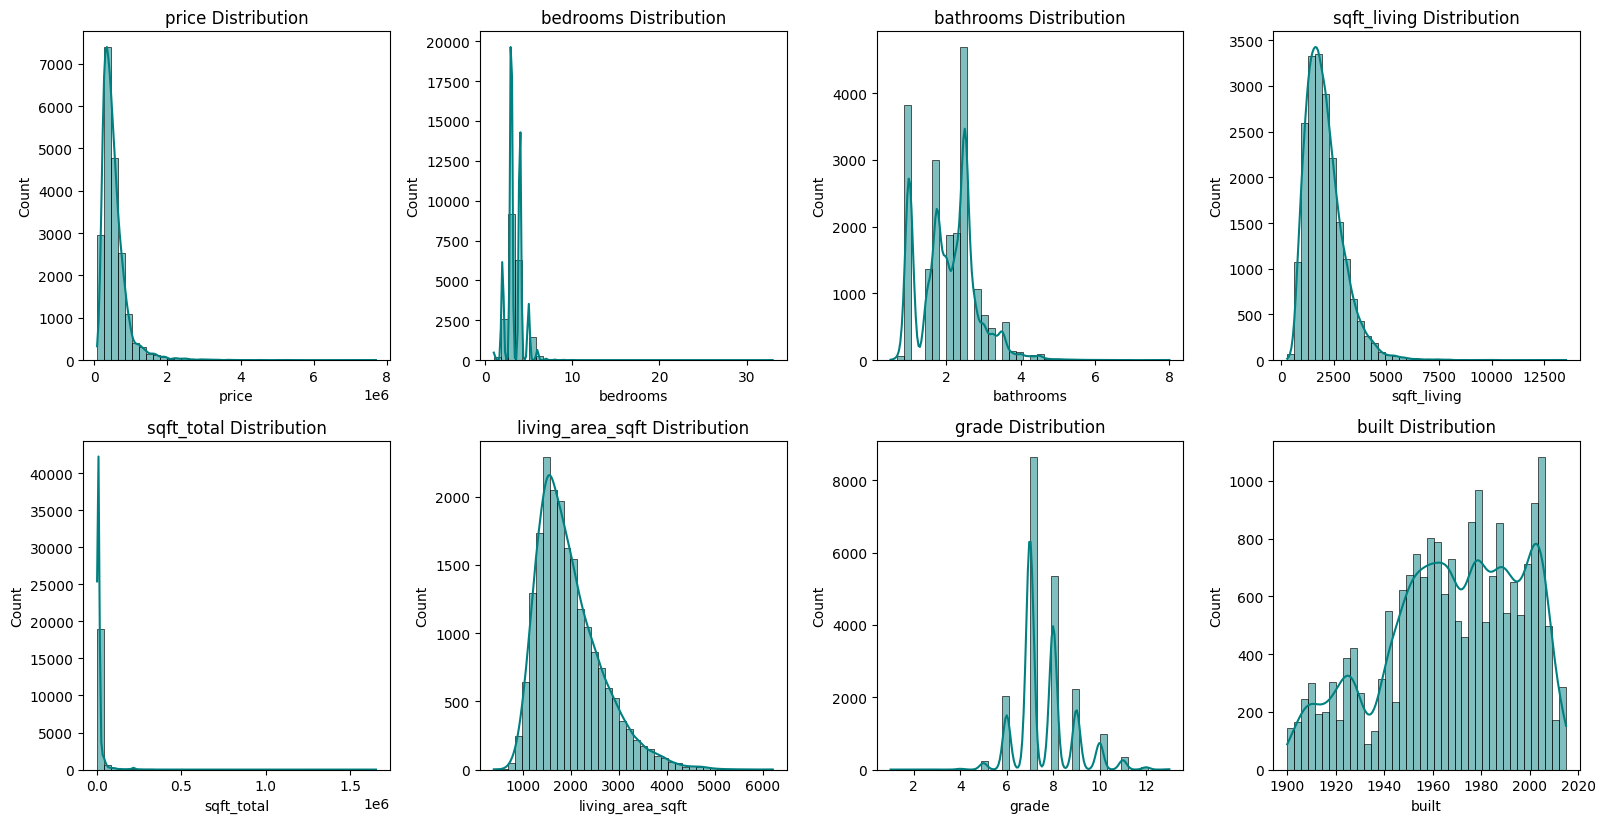

In [81]:
# As mentioned in class, using a for loop to get all histograms in one go
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_total', 'living_area_sqft', 'grade', 'built']

# Set up the grid: 4 columns per row
rows = (len(cols) + 2) // 3  # ensures enough rows
plt.figure(figsize=(16, 4 * rows))  # adjust overall size

for i, col in enumerate(cols, 1):
    plt.subplot(rows, 4, i)
    sns.histplot(df[col], kde=True, bins=40, color='teal')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Okay, we can see the distribution and skewness properly visaulized now

Let's look for outliers properly in the highly skewed columns

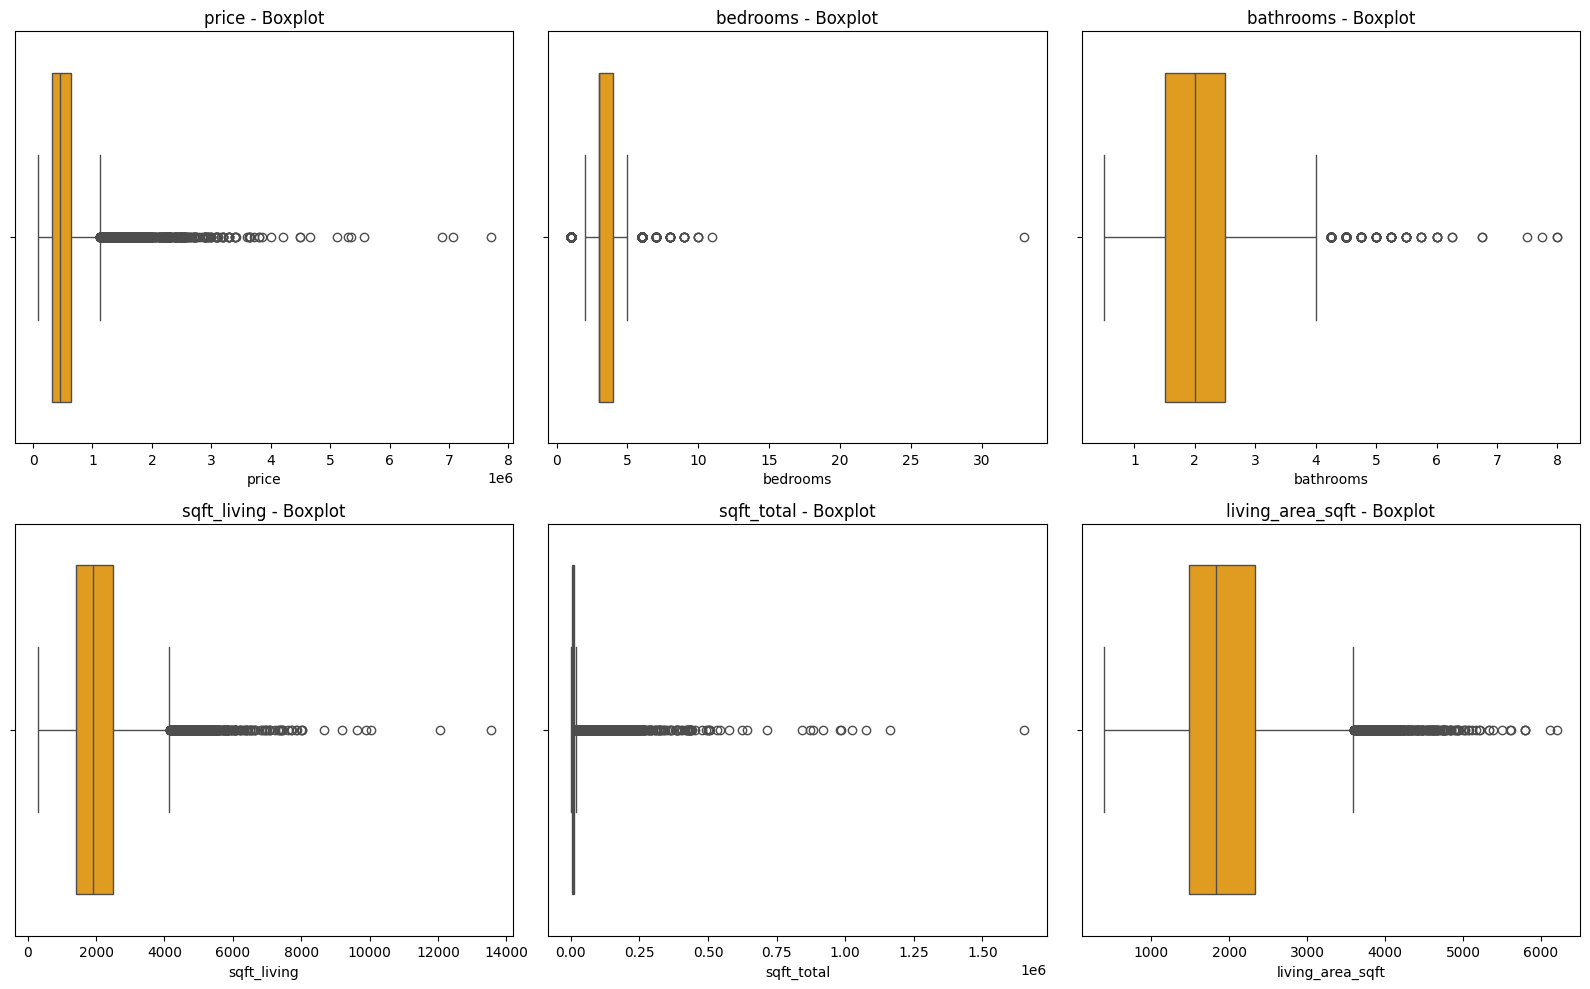

In [82]:
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_total', 'living_area_sqft']

plt.figure(figsize=(16, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'{col} - Boxplot')
    plt.tight_layout()

plt.show()


**Price** - Shows a heavy right skew with extreme outliers above $1 million, indicating the presence of luxury properties. I'm considering log transformation to reduce the imapact of skewness and these insane outliers.

**Bedrooms** - Values mostly within the normal residential range (1–6), but there’s a significant outlier at 33 bedrooms, which may represent an anomaly or commercial listing.

**Bathrooms** - We have a fairly symmetrically distributed, though a few listings have very high values (7–8), possibly luxury listings.

**Sqft_living & living_area_sqft** - Show long right tails, meaning most houses are mid-sized but a few are extremely large. These features are also good candidates for transformation.

**Sqft_total** - We have extreme outliers (up to over 1.5 million sqft), which are unrealistic for residential properties. These will need to be investigated or removed.

**I will now attempt to fix the skewness in some of the more important columns via log transformation i.e starting Feature Engineering/Transformation**

In [86]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# List of numeric columns we want to check
columns_to_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_total', 'living_area_sqft']

# Loop through each column and report outlier count
for col in columns_to_check:
    outliers, lb, ub = detect_outliers_iqr(df, col)
    print(f"{col} → Outliers Detected: {len(outliers)} | Lower Bound: {lb} | Upper Bound: {ub}")

price → Outliers Detected: 1051 | Lower Bound: -167500.0 | Upper Bound: 1124500.0
bedrooms → Outliers Detected: 511 | Lower Bound: 1.5 | Upper Bound: 5.5
bathrooms → Outliers Detected: 230 | Lower Bound: 0.0 | Upper Bound: 4.0
sqft_living → Outliers Detected: 552 | Lower Bound: -215.0 | Upper Bound: 4145.0
sqft_total → Outliers Detected: 2331 | Lower Bound: -3125.0 | Upper Bound: 19475.0
living_area_sqft → Outliers Detected: 549 | Lower Bound: 230.0 | Upper Bound: 3590.0


In [90]:
summary_table

,count,mean,std,min,25%,50%,75%,max
price,19995.0,535394.404051,365921.655721,75000.0,317000.0,449900.0,640000.0,7700000.0
bedrooms,19995.0,3.366242,0.929898,1.0,3.0,3.0,4.0,33.0
bathrooms,19995.0,2.072893,0.760998,0.5,1.5,2.0,2.5,8.0
sqft_living,19995.0,2057.860465,905.621925,290.0,1420.0,1900.0,2510.0,13540.0
sqft_total,19995.0,15605.718430,41774.813188,520.0,5350.0,7814.0,11000.0,1651359.0
floors,19995.0,1.444811,0.516670,1.0,1.0,1.0,2.0,3.5
condition,19995.0,3.441760,0.665492,1.0,3.0,3.0,4.0,5.0
grade,19995.0,7.605451,1.172447,1.0,7.0,7.0,8.0,13.0
built,19995.0,1967.948887,28.317206,1900.0,1950.0,1969.0,1991.0,2015.0
renovated,19995.0,90.830208,415.987523,0.0,0.0,0.0,0.0,2015.0


- So IQR gave for some of the columns, negative lower bounds which are physically impossible so the lower bounds will be ignored and the upper bounds will be used to filter out the outliers
- I shall employ log transformation to price, sqft_living, sqft_total and liviing_area_sqft simply because they're extremely skewed and too many skew values.
- Bedrooms have a decent number of outliers so perhaps I can cap them at 10 when the maximum value is at 33 which should reduce the outliers considerably
- Bathrooms, the upper bound seems to be at 4 but large buildings or luxurious homes can have 8 bathrooms so it doesn't feel like an insane or unrealistic values so I won't be touching it

**Now I shall be using log transformation to reduce the effects of the extreme values in our case, normalize the skewed distributionss, and make the data more suitable for the modelling we shall be doing later**

In [91]:
df['price_log'] = np.log1p(df['price'])  # target variable
df['sqft_living_log'] = np.log1p(df['sqft_living'])
df['sqft_total_log'] = np.log1p(df['sqft_total'])
df['living_area_log'] = np.log1p(df['living_area_sqft'])

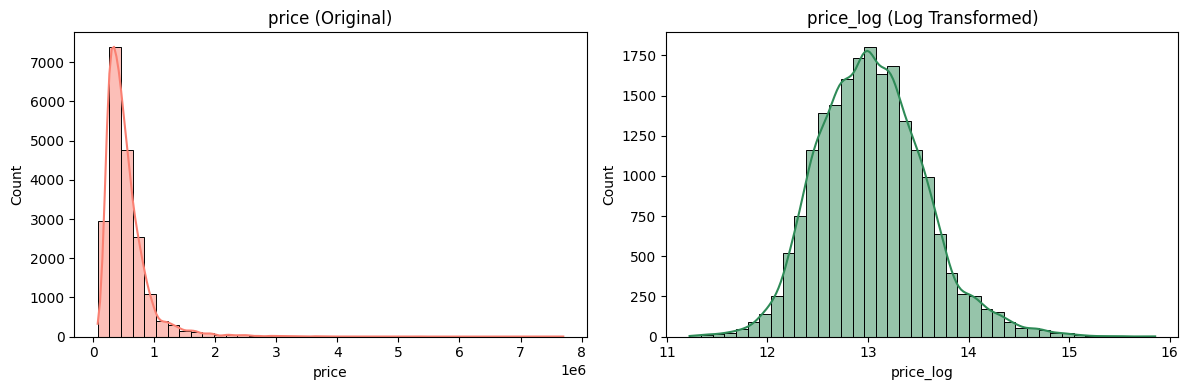

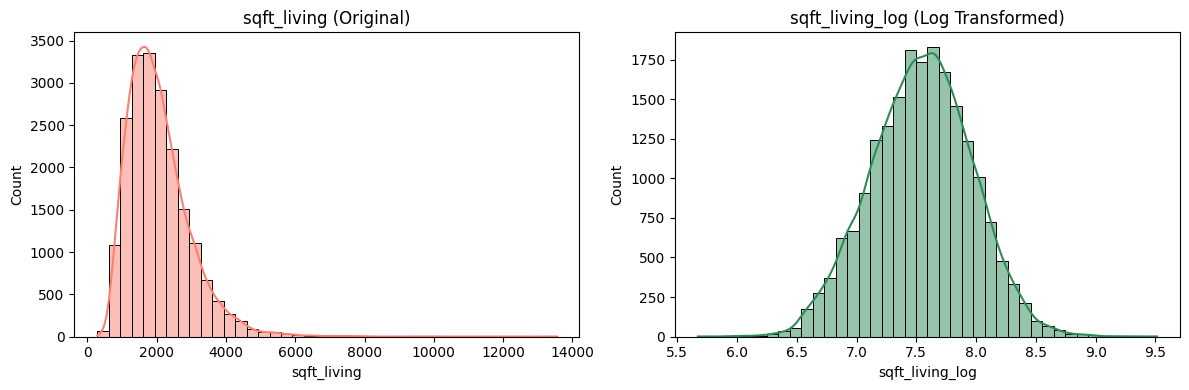

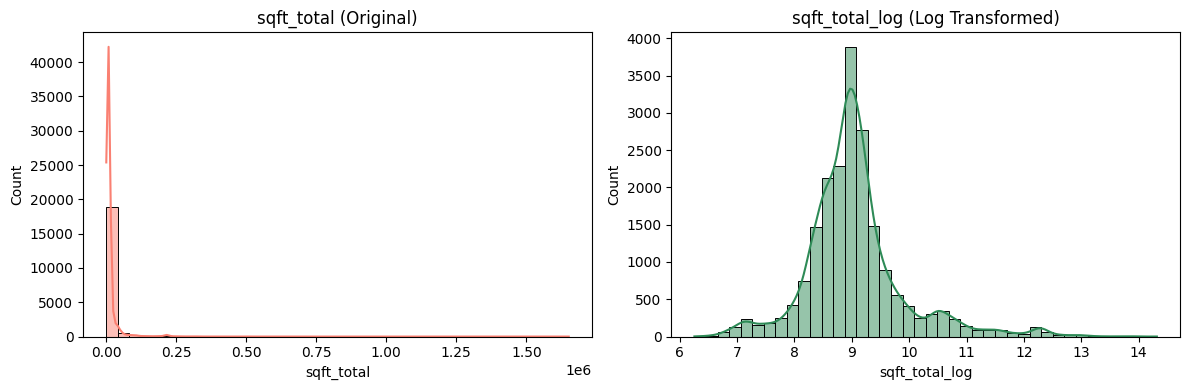

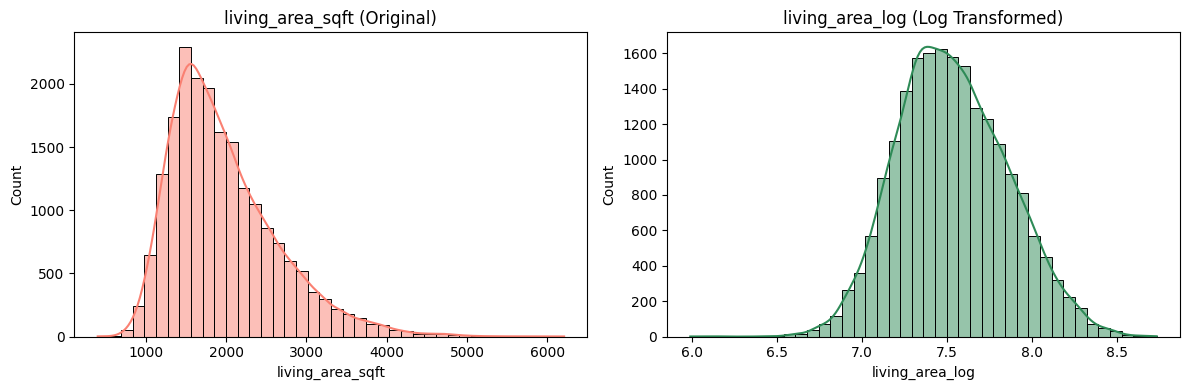

In [92]:
cols = [
    ('price', 'price_log'),
    ('sqft_living', 'sqft_living_log'),
    ('sqft_total', 'sqft_total_log'),
    ('living_area_sqft', 'living_area_log')
]

for original, transformed in cols:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[original], kde=True, bins=40, color='salmon')
    plt.title(f"{original} (Original)")

    plt.subplot(1, 2, 2)
    sns.histplot(df[transformed], kde=True, bins=40, color='seagreen')
    plt.title(f"{transformed} (Log Transformed)")

    plt.tight_layout()
    plt.show()

Perfect. I guess log transformation worked and we can viisaully see the normalization of the data. It's ready for modelling it seems then

In [94]:
# I'm not dropping the outliers since I can keep the rows, and at the same time reduce the impact of anomalous data points like 33 bedrooms 
# Cap extreme bedroom values to 10 (everything above 10 becomes 10)
df['bedrooms'] = df['bedrooms'].apply(lambda x: 10 if x > 10 else x)


In [95]:
summary_table

,count,mean,std,min,25%,50%,75%,max
price,19995.0,535394.404051,365921.655721,75000.0,317000.0,449900.0,640000.0,7700000.0
bedrooms,19995.0,3.366242,0.929898,1.0,3.0,3.0,4.0,33.0
bathrooms,19995.0,2.072893,0.760998,0.5,1.5,2.0,2.5,8.0
sqft_living,19995.0,2057.860465,905.621925,290.0,1420.0,1900.0,2510.0,13540.0
sqft_total,19995.0,15605.718430,41774.813188,520.0,5350.0,7814.0,11000.0,1651359.0
floors,19995.0,1.444811,0.516670,1.0,1.0,1.0,2.0,3.5
condition,19995.0,3.441760,0.665492,1.0,3.0,3.0,4.0,5.0
grade,19995.0,7.605451,1.172447,1.0,7.0,7.0,8.0,13.0
built,19995.0,1967.948887,28.317206,1900.0,1950.0,1969.0,1991.0,2015.0
renovated,19995.0,90.830208,415.987523,0.0,0.0,0.0,0.0,2015.0


In [101]:
cols_to_compare = [
    ('price', 'price_log'),
    ('sqft_living', 'sqft_living_log'),
    ('sqft_total', 'sqft_total_log'),
    ('living_area_sqft', 'living_area_log'),
    ('bedrooms', None)  # No transformation, just capping
]

# Build comparison table
summary_comparison = []

for original, transformed in cols_to_compare:
    orig_stats = df[original].describe()
    
    summary_comparison.append({
        'Feature': original,
        'Type': 'Capped' if original == 'bedrooms' else 'Original',
        'Mean': round(orig_stats['mean'], 2),
        'Median': round(orig_stats['50%'], 2),
        'Std': round(orig_stats['std'], 2),
        'Min': round(orig_stats['min'], 2),
        'Max': round(orig_stats['max'], 2),
        'Skew': round(df[original].skew(), 2)
    })

    if transformed:  # For log-transformed features
        trans_stats = df[transformed].describe()
        summary_comparison.append({
            'Feature': original,
            'Type': 'Log-Transformed',
            'Mean': round(trans_stats['mean'], 2),
            'Median': round(trans_stats['50%'], 2),
            'Std': round(trans_stats['std'], 2),
            'Min': round(trans_stats['min'], 2),
            'Max': round(trans_stats['max'], 2),
            'Skew': round(df[transformed].skew(), 2)
        })

summary_df = pd.DataFrame(summary_comparison)
summary_df

# Used AI's help for this block of code since I couldn't figure it out properly via Stack Overflow


,Feature,Type,Mean,Median,Std,Min,Max,Skew
0,price,Original,535394.40,449900.00,365921.66,75000.00,7700000.00,4.12
1,price,Log-Transformed,13.04,13.02,0.53,11.23,15.86,0.42
2,sqft_living,Original,2057.86,1900.00,905.62,290.00,13540.00,1.52
3,sqft_living,Log-Transformed,7.54,7.55,0.42,5.67,9.51,-0.04
4,sqft_total,Original,15605.72,7814.00,41774.81,520.00,1651359.00,13.04
5,sqft_total,Log-Transformed,9.05,8.96,0.87,6.26,14.32,1.17
6,living_area_sqft,Original,1974.12,1830.00,675.12,399.00,6210.00,1.12
7,living_area_sqft,Log-Transformed,7.53,7.51,0.32,5.99,8.73,0.20
8,bedrooms,Capped,3.37,3.00,0.91,1.00,10.00,0.59


As we can see the skewness of the 5 main variables has significantly reduced. 
- Price (it went down from 4.12 to 0.42)
- Sqft_living (it went from 1.52 to -0.04)
- Sqft_total (went from 13.04 to 1.17)
- living_area_sqft (is now at 0.2 from 1.12)
- Bedrooms (now at 0.59 from 2.1)

- I believe now is the time to employ scaling to normalizes feature values to the same magnitude so that modelling can work effectively
- Since in the future I intend of trying to predict the housing prices, it will become my main target variable hence everything else shall be scaled

In [104]:
# Create a copy of the DataFrame to preserve original

from sklearn.preprocessing import StandardScaler, MinMaxScaler
df_scaled = df.copy()

**sqft_living_log → StandardScaler**
  - StandardScaler centers it at mean 0 and scales by standard deviation
  - Ideal for linear models

**sqft_total_log → MinMaxScaler**
  - Still slightly skewed, but within a bounded range after transformation
  - MinMaxScaler compresses values to [0, 1] without assuming normality
  - Preserves spacing for use in models like KNN, decision trees

**living_area_log → StandardScaler**
  - Similar to sqft_living_log: log-transformed and bell-shaped
  - StandardScaler improves training stability for algorithms that expect standardized inputs
 **bathrooms → MinMaxScaler**
  - Already within a small numeric range (0.5–8.0)
  - MinMaxScaler preserves the spread while scaling to [0, 1]

**bedrooms (capped at 10) → MinMaxScaler**
  - Integer feature with a tight range (1–10)
  - MinMaxScaler maps it proportionally without distorting relationships


In [108]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create a copy of the DataFrame to preserve original
df_scaled = df.copy()

# Define the scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()


In [109]:
# Scale sqft_living using StandardScaler
# Justification: Symmetric-ish distribution after log transform; common for linear models
df_scaled['sqft_living_scaled'] = standard_scaler.fit_transform(df_scaled[['sqft_living_log']])

# Scale sqft_total using MinMaxScaler
# Justification: Data still slightly skewed and has wide range; MinMaxScaler retains distribution and is good for neural nets/distance-based models
df_scaled['sqft_total_scaled'] = minmax_scaler.fit_transform(df_scaled[['sqft_total_log']])

# Scale living_area_sqft using StandardScaler
# Justification: After log transformation it is approximately normal, so StandardScaler works well
df_scaled['living_area_sqft_scaled'] = standard_scaler.fit_transform(df_scaled[['living_area_log']])

# Scale bathrooms using MinMaxScaler
# Justification: Feature is already within a limited range and contains decimals; MinMaxScaler preserves proportions
df_scaled['bathrooms_scaled'] = minmax_scaler.fit_transform(df_scaled[['bathrooms']])

# Scale bedrooms using MinMaxScaler
# Justification: Small integer range, easy to interpret with MinMax, not highly skewed now after capping
df_scaled['bedrooms_scaled'] = minmax_scaler.fit_transform(df_scaled[['bedrooms']])

# Scale price_log using StandardScaler
# Justification: After log transform, price resembles a normal distribution
df_scaled['price_scaled'] = standard_scaler.fit_transform(df_scaled[['price_log']])

# Preview the scaled data
df_scaled[['sqft_living_scaled', 'sqft_total_scaled', 'living_area_sqft_scaled',
           'bathrooms_scaled', 'bedrooms_scaled', 'price_scaled']].describe()

,sqft_living_scaled,sqft_total_scaled,living_area_sqft_scaled,bathrooms_scaled,bedrooms_scaled,price_scaled
count,1.999500e+04,19995.000000,1.999500e+04,19995.000000,19995.000000,1.999500e+04
mean,2.028396e-15,0.346631,1.119385e-16,0.209719,0.262782,-3.589138e-16
std,1.000025e+00,0.107606,1.000025e+00,0.101466,0.100755,1.000025e+00
min,-4.422159e+00,0.000000,-4.758395e+00,0.000000,0.000000,-3.425981e+00
25%,-6.677617e-01,0.288945,-7.015217e-01,0.133333,0.222222,-7.016197e-01
50%,2.123222e-02,0.335930,-6.815573e-02,0.200000,0.222222,-3.986156e-02
75%,6.801156e-01,0.378347,6.762719e-01,0.266667,0.333333,6.262807e-01
max,4.669485e+00,1.000000,3.698026e+00,1.000000,1.000000,5.327854e+00


Now that I'm done with log transformations and correctly (hopefully) scaling the important features, let's try to create a correlation matrix

C:\Users\omerz\AppData\Local\Temp\ipykernel_35608\2461714509.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_corr.values, y=price_corr.index, palette='coolwarm')


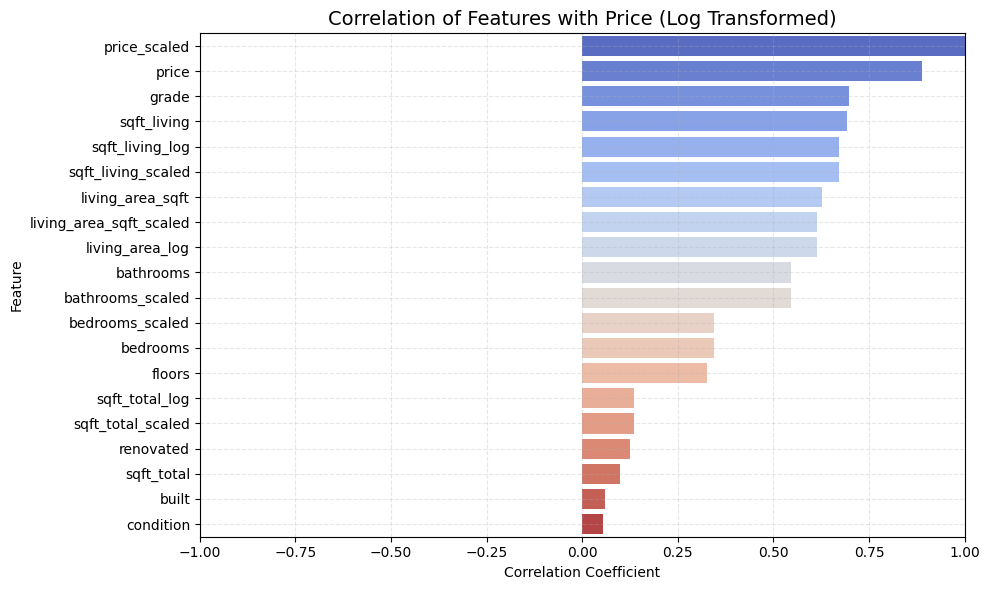

In [120]:
# Create correlation matrix of all numeric columns
correlations = df_scaled.corr(numeric_only=True)

# Extract only the correlations with price_log
price_corr = correlations['price_log'].sort_values(ascending=False)

# Drop self-correlation
price_corr = price_corr[price_corr.index != 'price_log']

correlation_matrix = df_scaled[selected_features].corr()

# Plot as barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=price_corr.values, y=price_corr.index, palette='coolwarm')
plt.title('Correlation of Features with Price (Log Transformed)', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.xlim(-1, 1)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

As we can see Price is heavily correlated with sqft_living_log, living_area_sqft

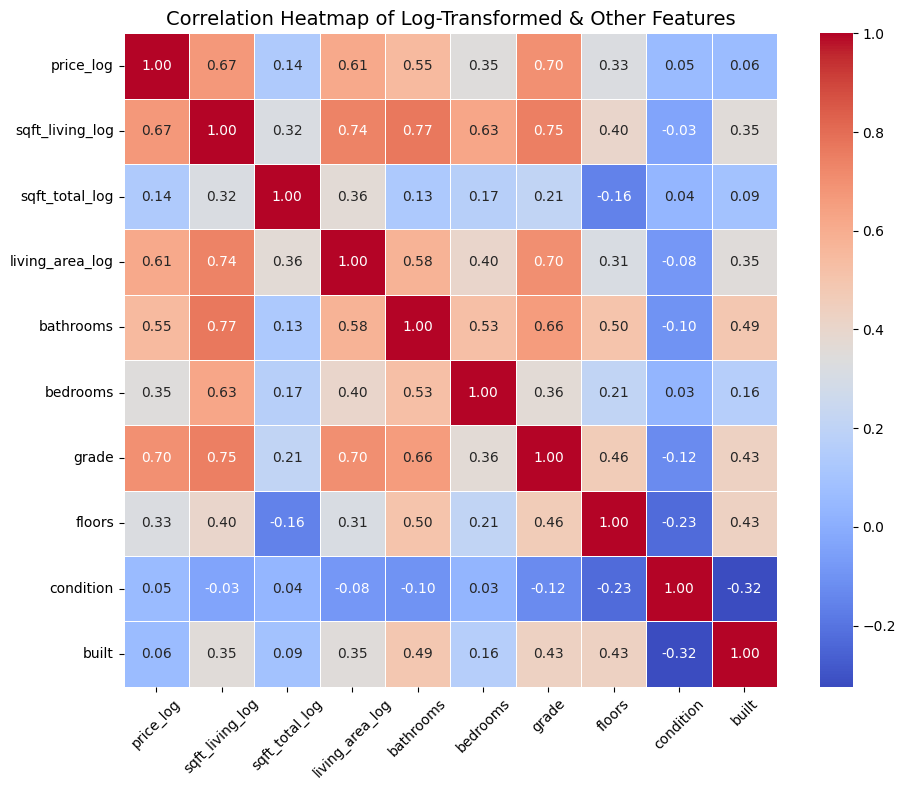

In [124]:
log_features = [
    'price_log',
    'sqft_living_log',
    'sqft_total_log',
    'living_area_log'
]

# Optional: Add non-log numeric features that are not heavily skewed
other_numerics = ['bathrooms', 'bedrooms', 'grade', 'floors', 'condition', 'built']

# Combine for the full matrix
correlation_features = log_features + other_numerics
corr_matrix = df_scaled[correlation_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Log-Transformed & Other Features', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


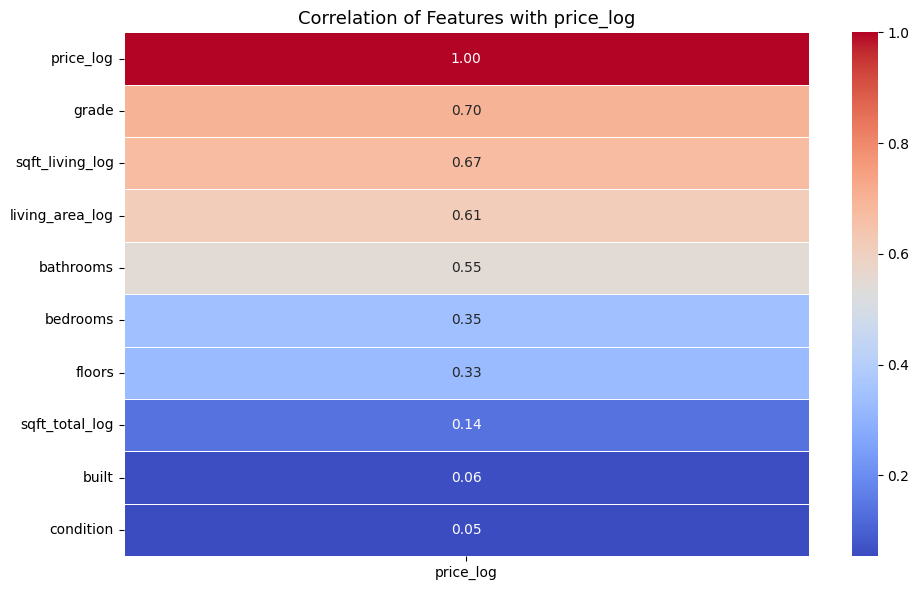

In [130]:
# Select relevant columns
selected_features = [
    'price_log',               # Target (log-transformed, not scaled)
    'sqft_living_log',         # Log-transformed features
    'sqft_total_log',
    'living_area_log',
    'bathrooms',               # No log version (used as-is)
    'bedrooms',
    'grade',
    'floors',
    'condition',
    'built'
]

# Compute correlation matrix
corr_selected = df_scaled[selected_features].corr()

# Plot correlation with price_log
plt.figure(figsize=(10, 6))
sns.heatmap(corr_selected[['price_log']].sort_values(by='price_log', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation of Features with price_log', fontsize=13)
plt.tight_layout()
plt.show()

### **Deduction**
#### Best predictors of price in order 
- Grade (0.7)
- Sqft_living (0.67)
- Living_area (0.61)
- Bathrooms (0.55)
- Bedroom (0.35)
- Floors (0.33)
- sqft_total (0.14)
- Built (0.06)
- Condition (0.05) 


### Decision making time
- Im dropping built, condition, sqft_total due to very low correlation
- I'm dropping living area because it has high correlation (0.74) with sqft_living which can potentially cause multicollinearity 

In [131]:
df_scaled = df_scaled.drop(columns=[
    'living_area_log',
    'sqft_total_log',
    'built',
    'condition'
])

# (Optional) Verify columns after dropping
print("Remaining columns after feature drop:")
print(df_scaled.columns)

Remaining columns after feature drop:
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_total', 'floors',
       'grade', 'renovated', 'living_area_sqft', 'price_log',
       'sqft_living_log', 'sqft_living_scaled', 'sqft_total_scaled',
       'living_area_sqft_scaled', 'bathrooms_scaled', 'bedrooms_scaled',
       'price_scaled', 'price_log_scaled'],
      dtype='object')


# Starting Predictive Modelling to be able to predict price in the future

Starting with Linear regression. Its the most popular model that is used as far as I know. Should provide easy to read results, easier to interpret and have a solid baseline with which we can compare other more robust or complex models like Random Forest that we did in class.